<a href="https://colab.research.google.com/github/mstf53/Statistics/blob/main/Copy_of_Stats_Assign_(Central_Tendency%26_Dispersion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descriptive Statistics

 Import **NumPy**, **SciPy**, and **Pandas**

In [6]:
import numpy as np
from scipy import stats
import pandas as pd

 Randomly generate 1,000 samples from the normal distribution using `np.random.normal()`(mean = 100, standard deviation = 15)

In [7]:
samples = np.random.normal(loc= 100, scale= 15, size=1000)


Compute the **mean**, **median**, and **mode**

In [8]:
mean =  np.mean(samples)
median = np.median(samples)
mode = stats.mode(samples)
print(mean, median, mode)

99.93935603035014 99.712277171131 ModeResult(mode=array([57.12251891]), count=array([1]))


Compute the **min**, **max**, **Q1**, **Q3**, and **interquartile range**

In [9]:
min = np.min(samples)
max = np.max(samples)
q1 = np.percentile(samples, 25)
q3 = np.percentile(samples, 75)
iqr = q3 - q1
print(min, max, q1, q3, iqr)

57.12251890961984 148.26942324524026 89.75682353057582 109.99560128387184 20.23877775329602


Compute the **variance** and **standard deviation**

In [10]:
variance = np.var(samples)
std_dev = np.std(samples)
print(variance, std_dev)

226.88084846501152 15.062564471729624


Compute the **skewness** and **kurtosis**

You can use [`scipy.stats.skew`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) and [`scipy.stats.kurtosis`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)

In [18]:
from scipy.stats import kurtosis, skew
skewness = stats.skew(samples)
kurtosis = stats.kurtosis(samples)
print(skewness, kurtosis)
skewness2 = skew(samples)
skewness2

0.06957898739856157 -0.08804245954192469


0.06957898739856157

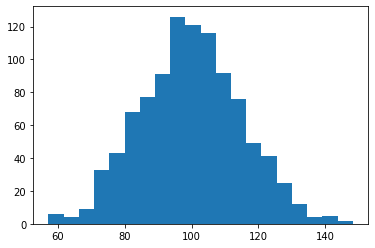

In [19]:
import matplotlib.pyplot as plt
plt.hist(samples, bins=20);


## NumPy Correlation Calculation

Create an array x of integers between 10 (inclusive) and 20 (exclusive). Use `np.arange()`

In [20]:
import numpy as np
x = np.arange(10,20)
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Then use `np.array()` to create a second array y containing 10 arbitrary integers.

In [25]:
y = np.array(np.random.randint(0,50,10))
y


array([ 8, 14, 49, 14, 19, 28, 11, 47, 34, 30])

Once you have two arrays of the same length, you can compute the **correlation coefficient** between x and y

In [26]:
r = np.corrcoef(x, y)
r

array([[1.        , 0.41031684],
       [0.41031684, 1.        ]])

## Pandas Correlation Calculation

Run the code below

In [32]:
import pandas as pd
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
x

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

Call the relevant method  to calculate Pearson's r correlation.

In [29]:
r = stats.pearsonr(x,y)
r

(0.758640289091187, 0.010964341301680813)

In [34]:
r1 = x.corr(y)
r1

0.7586402890911867

OPTIONAL. Call the relevant method to calculate Spearman's rho correlation.

In [33]:
rho = stats.spearmanr(x,y)
rho

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)

## Seaborn Dataset Tips

Import Seaborn Library

In [35]:
import seaborn as sns

Load "tips" dataset from Seaborn

In [38]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Generate descriptive statistics include those that summarize the central tendency, dispersion

In [37]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Call the relevant method to calculate pairwise Pearson's r correlation of columns

In [39]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [41]:
a = tips["total_bill"]
size = tips["size"]
r = a.corr(size)
r

0.5983151309049022

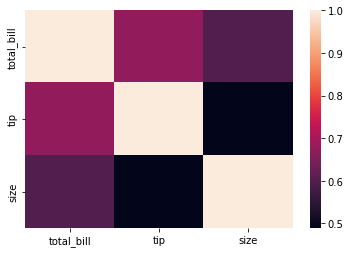

In [42]:
sns.heatmap(tips.corr())